## Alhajuela Lake Bed Sedimentation Prediction

In [165]:
import sys
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
print(sys.version)
print(sklearn.__version__)
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing


1.21.2
1.3.2
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [166]:
print(np.__version__)
print(pd.__version__)
print(sys.version)
print(sklearn.__version__)

1.21.2
1.3.2
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [174]:
df = pd.read_csv('data/NorthAllYears.csv', delim_whitespace=False, header=0)

In [175]:
df.keys()

Index(['x', 'y', 'h', 'slope', 'dRM2', 'years', 'h97', 'dh', 'depth', 'RM3',
       'x2', 'y2'],
      dtype='object')

In [176]:
df.head()

x            y      h  slope  dRM2  years    h97     dh  depth  \
0 655,734.71 1,028,636.65 695.07  34.27  0.31     22 668.84  26.23  88.84   
1 655,759.71 1,028,636.65 693.53  29.88  0.31     22 688.32   5.20 108.32   
2 655,784.71 1,028,636.65 697.60  29.28  0.31     22 701.34  -3.74 121.34   
3 655,809.71 1,028,636.65 708.04  37.76  0.32     22 721.87 -13.83 141.87   
4 655,834.71 1,028,636.65 708.36  46.58  0.32     22 717.76  -9.40 137.76   

       RM3   x2  y2  
0 4,845.80  275   0  
1 4,831.39  300   0  
2 4,817.06  325   0  
3 4,802.82  350   0  
4 4,788.67  375   0

In [177]:
col_study = ['y','x','dRM2', 'slope', 'years', 'h97', 'depth', 'y2','x2','RM3']
param_study = 'dh'

In [178]:
#samples = sklearn.utils.resample(df, n_samples=1000, random_state=None, stratify=None)

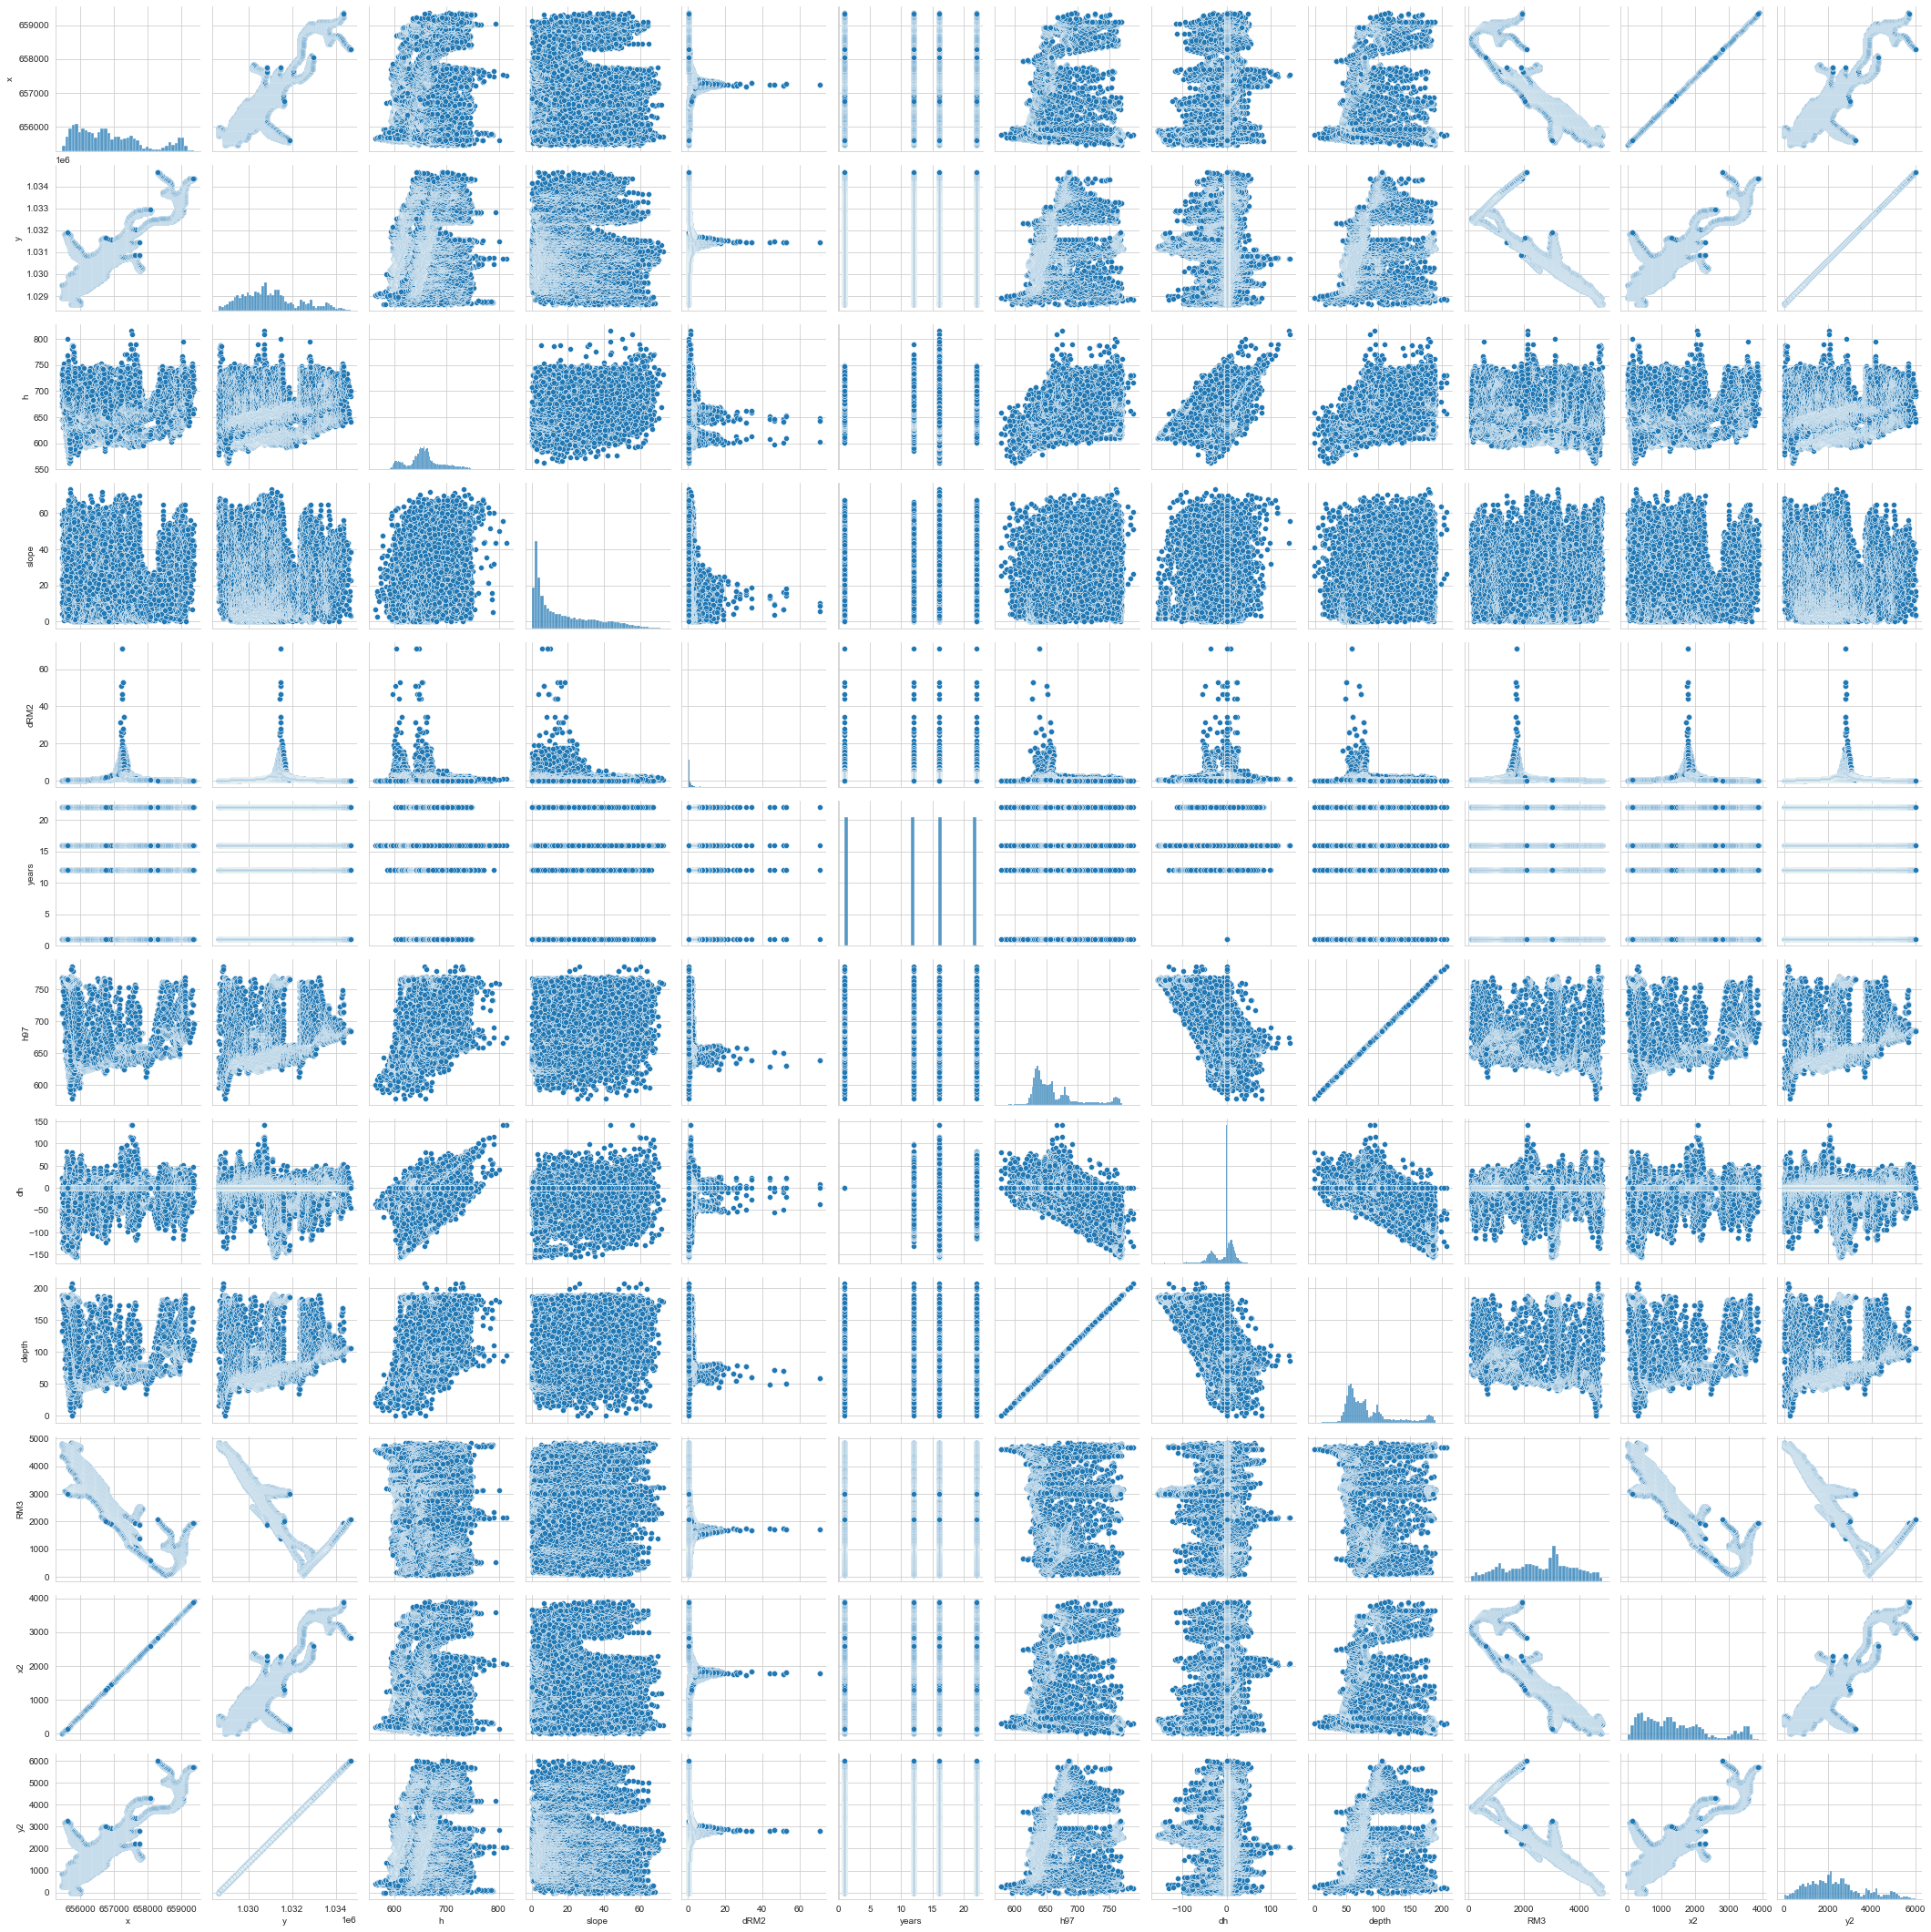

In [179]:
sns.pairplot(df);
plt.show()

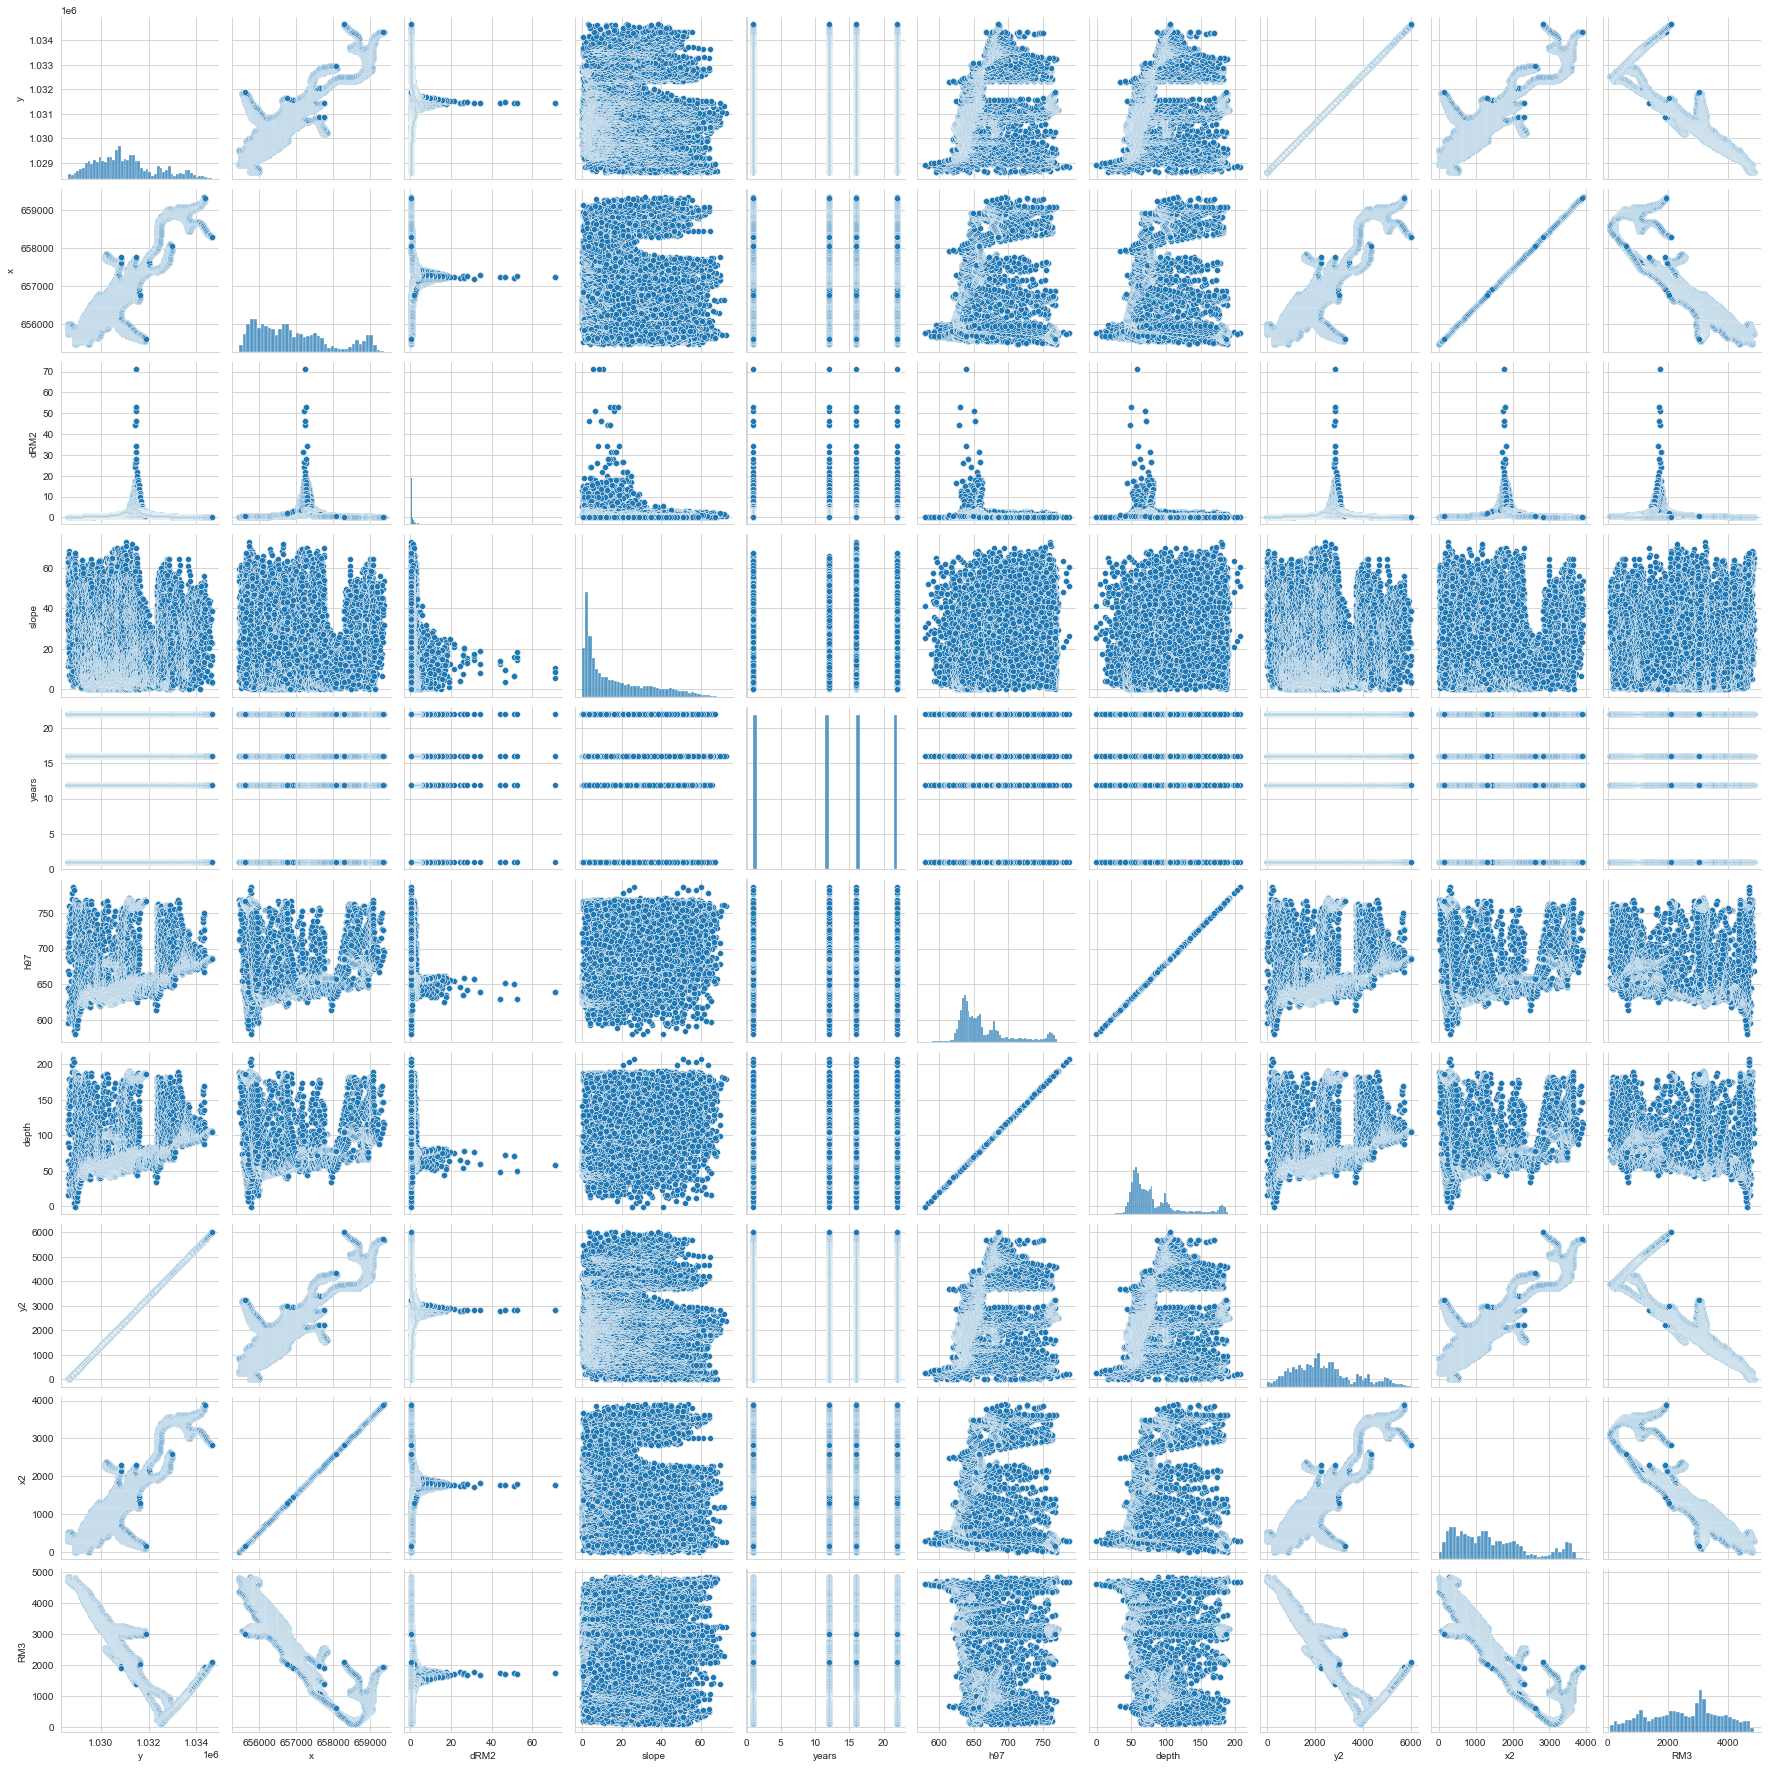

In [180]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

# Correlation Analysis and Feature Selection

In [181]:
pd.options.display.float_format = '{:,.3f}'.format

In [182]:
df.corr()

x      y      h  slope   dRM2  years    h97     dh  depth    RM3  \
x      1.000  0.867  0.312  0.053  0.084  0.000  0.153  0.117  0.153 -0.895   
y      0.867  1.000  0.287 -0.008  0.086  0.000  0.287 -0.041  0.287 -0.893   
h      0.312  0.287  1.000  0.443 -0.079 -0.138  0.611  0.350  0.611 -0.226   
slope  0.053 -0.008  0.443  1.000 -0.119 -0.001  0.469 -0.071  0.469  0.054   
dRM2   0.084  0.086 -0.079 -0.119  1.000 -0.000 -0.088  0.020 -0.088 -0.198   
years  0.000  0.000 -0.138 -0.001 -0.000  1.000  0.000 -0.092  0.000 -0.000   
h97    0.153  0.287  0.611  0.469 -0.088  0.000  1.000 -0.459  1.000 -0.170   
dh     0.117 -0.041  0.350 -0.071  0.020 -0.092 -0.459  1.000 -0.459 -0.025   
depth  0.153  0.287  0.611  0.469 -0.088  0.000  1.000 -0.459  1.000 -0.170   
RM3   -0.895 -0.893 -0.226  0.054 -0.198 -0.000 -0.170 -0.025 -0.170  1.000   
x2     1.000  0.867  0.312  0.053  0.084  0.000  0.153  0.117  0.153 -0.895   
y2     0.867  1.000  0.287 -0.008  0.086  0.000  0.287 -0.041  0.287 -0.893   

          x2     y2  
x      1.000  0.867  
y      0.867  1.000  
h      0.312  0.287  
slope  0.053 -0.008  
dRM2   0.084  0.086  
years  0.000  0.000  
h97    0.153  0.287  
dh     0.117 -0.041  
depth  0.153  0.287  
RM3   -0.895 -0.893  
x2     1.000  0.867  
y2     0.867  1.000

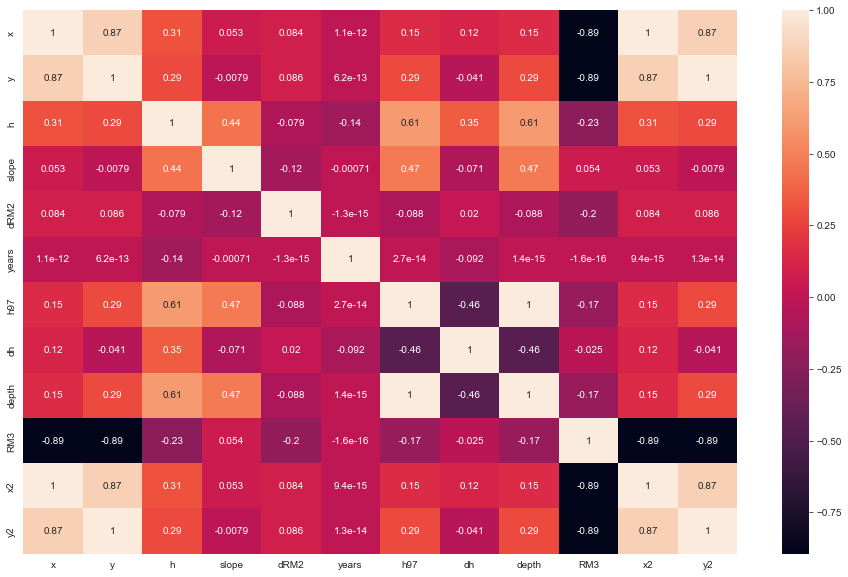

In [183]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

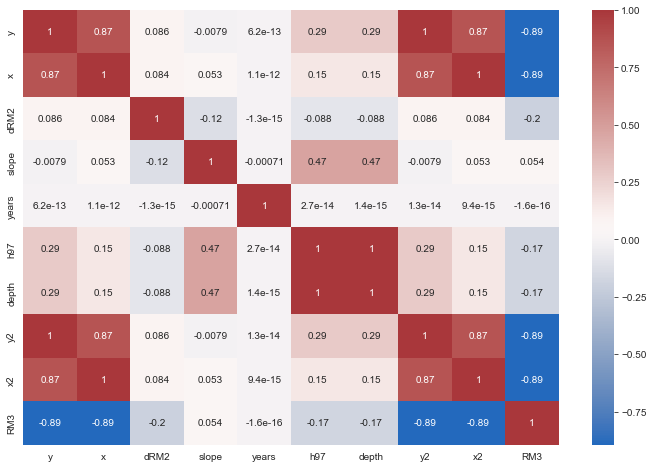

In [184]:
plt.figure(figsize=(12,8))
sns.heatmap(df[col_study].corr(), annot=True, cmap="vlag")
plt.show()

---

# Evaluating Regression Model Performance

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X, y = df[col_study], df[param_study]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [188]:
print(X_train.shape)

(20044, 10)


In [189]:
print(y_train.shape)

(20044,)


# Correlation Matrix

#### Useful daigrnostic tool to identify colinearity between predictors

In [190]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

x     y     h  slope  dRM2  years   h97    dh  depth   RM3    x2  \
x      1.00  0.87  0.31   0.05  0.08   0.00  0.15  0.12   0.15 -0.89  1.00   
y      0.87  1.00  0.29  -0.01  0.09   0.00  0.29 -0.04   0.29 -0.89  0.87   
h      0.31  0.29  1.00   0.44 -0.08  -0.14  0.61  0.35   0.61 -0.23  0.31   
slope  0.05 -0.01  0.44   1.00 -0.12  -0.00  0.47 -0.07   0.47  0.05  0.05   
dRM2   0.08  0.09 -0.08  -0.12  1.00  -0.00 -0.09  0.02  -0.09 -0.20  0.08   
years  0.00  0.00 -0.14  -0.00 -0.00   1.00  0.00 -0.09   0.00 -0.00  0.00   
h97    0.15  0.29  0.61   0.47 -0.09   0.00  1.00 -0.46   1.00 -0.17  0.15   
dh     0.12 -0.04  0.35  -0.07  0.02  -0.09 -0.46  1.00  -0.46 -0.02  0.12   
depth  0.15  0.29  0.61   0.47 -0.09   0.00  1.00 -0.46   1.00 -0.17  0.15   
RM3   -0.89 -0.89 -0.23   0.05 -0.20  -0.00 -0.17 -0.02  -0.17  1.00 -0.89   
x2     1.00  0.87  0.31   0.05  0.08   0.00  0.15  0.12   0.15 -0.89  1.00   
y2     0.87  1.00  0.29  -0.01  0.09   0.00  0.29 -0.04   0.29 -0.89  0.87   

         y2  
x      0.87  
y      1.00  
h      0.29  
slope -0.01  
dRM2   0.09  
years  0.00  
h97    0.29  
dh    -0.04  
depth  0.29  
RM3   -0.89  
x2     0.87  
y2     1.00

In [191]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

x     y    h  slope  dRM2  years  h97   dh  depth   RM3    x2    y2
x      1.00  0.87 0.00   0.00  0.00   0.00 0.00 0.00   0.00 -0.89  1.00  0.87
y      0.87  1.00 0.00   0.00  0.00   0.00 0.00 0.00   0.00 -0.89  0.87  1.00
h      0.00  0.00 1.00   0.00  0.00   0.00 0.61 0.00   0.61  0.00  0.00  0.00
slope  0.00  0.00 0.00   1.00  0.00   0.00 0.00 0.00   0.00  0.00  0.00  0.00
dRM2   0.00  0.00 0.00   0.00  1.00   0.00 0.00 0.00   0.00  0.00  0.00  0.00
years  0.00  0.00 0.00   0.00  0.00   1.00 0.00 0.00   0.00  0.00  0.00  0.00
h97    0.00  0.00 0.61   0.00  0.00   0.00 1.00 0.00   1.00  0.00  0.00  0.00
dh     0.00  0.00 0.00   0.00  0.00   0.00 0.00 1.00   0.00  0.00  0.00  0.00
depth  0.00  0.00 0.61   0.00  0.00   0.00 1.00 0.00   1.00  0.00  0.00  0.00
RM3   -0.89 -0.89 0.00   0.00  0.00   0.00 0.00 0.00   0.00  1.00 -0.89 -0.89
x2     1.00  0.87 0.00   0.00  0.00   0.00 0.00 0.00   0.00 -0.89  1.00  0.87
y2     0.87  1.00 0.00   0.00  0.00   0.00 0.00 0.00   0.00 -0.89  0.87  1.00

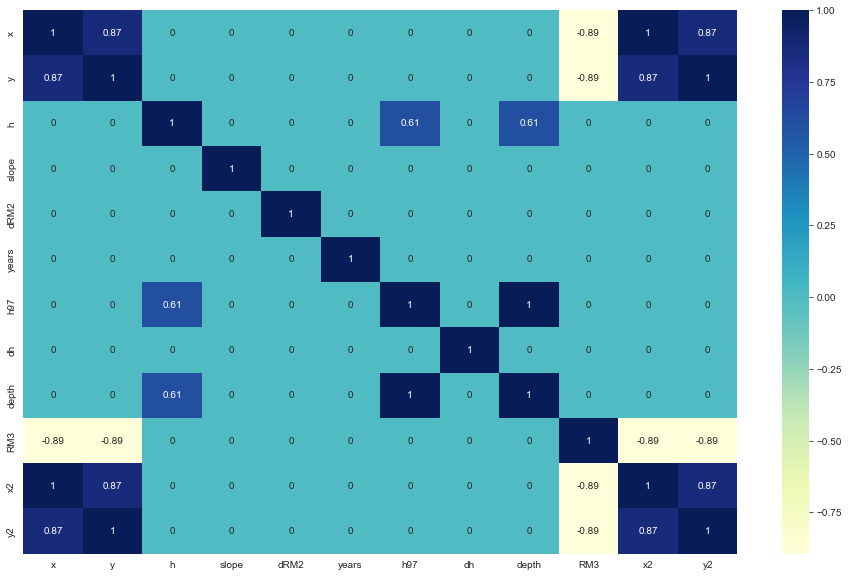

In [192]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

---

# Introduction to **Random Forest**

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [194]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)

In [197]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [198]:
y_train_pred = forest.predict(X_train)

In [199]:
y_test_pred = forest.predict(X_test)

In [200]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train: 8.0739, test: 54.9045


In [201]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

R^2 train: 0.9903, test: 0.9312


In [202]:
forest.feature_importances_

array([0.02490112, 0.02659518, 0.03523227, 0.05469341, 0.45892307,
       0.14267581, 0.15920224, 0.02315218, 0.02586389, 0.04876083])

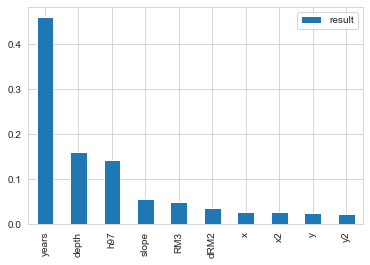

In [203]:
result = pd.DataFrame(forest.feature_importances_,  df[col_study].columns)
result.columns = ['result']
result.sort_values(by='result', ascending=False).plot(kind='bar');

---

In this plot you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. For very low values of gamma, you can see that both the training score and the validation score are low. This is called underfitting. Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well. If gamma is too high, the classifier will overfit, which means that the training score is good but the validation score is poor.

In [204]:
param_range =  np.logspace(-6, 3, 6)
parameter_range = np.arange(1, 10, 1)
param_range

array([1.00000000e-06, 6.30957344e-05, 3.98107171e-03, 2.51188643e-01,
       1.58489319e+01, 1.00000000e+03])

In [205]:
#train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)
train_scores, test_scores = validation_curve(RandomForestRegressor(), X, y, param_name="ccp_alpha", param_range=param_range,cv=5)
#train_scores, test_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=param_range,cv=5)
#train_scores, test_scores = validation_curve(KNeighborsClassifier(), X,y,param_name = "n_neighbors",param_range = parameter_range,cv = 5, scoring = "accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

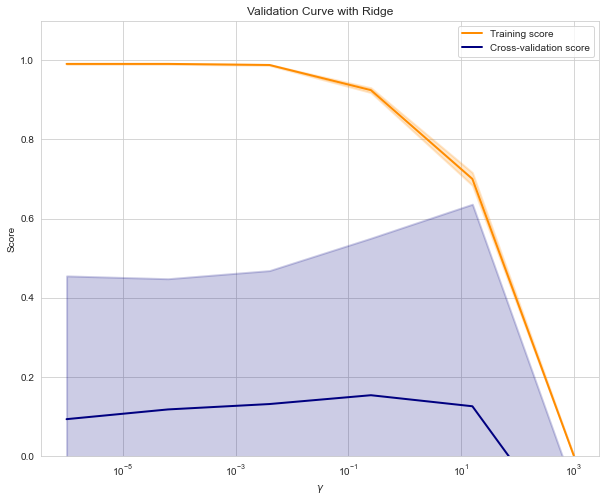

In [206]:
plt.figure(figsize=(10,8))
plt.title("Validation Curve with Ridge")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. Consider the following example where we plot the learning curve of a naive Bayes classifier and an SVM.

For the naive Bayes, both the validation score and the training score converge to a value that is quite low with increasing size of the training set. Thus, we will probably not benefit much from more training data.

In contrast, for small amounts of data, the training score of the SVM is much greater than the validation score. Adding more training samples will most likely increase generalization.

 """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

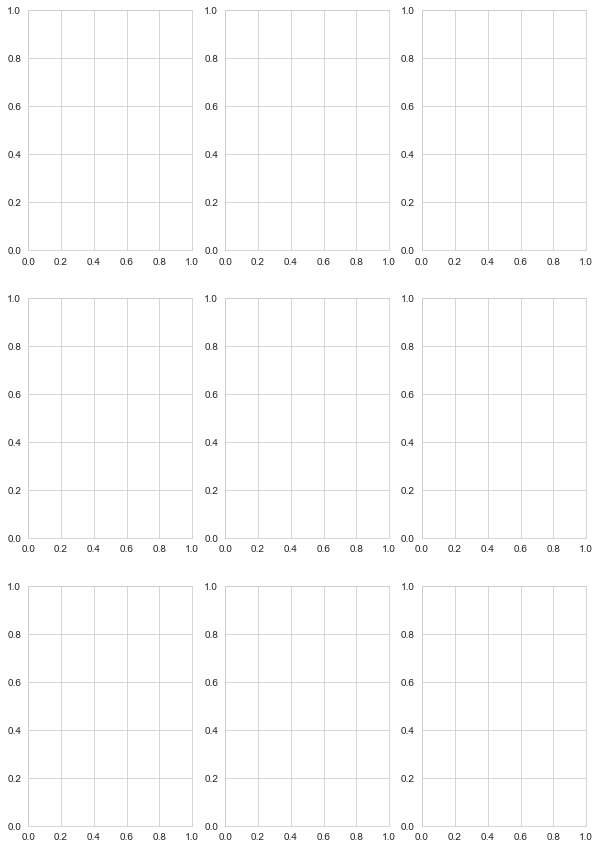

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 8),
):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
       n_jobs=n_jobs,
       train_sizes=train_sizes,
        return_times=True,
        #scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(10, 15))

X = df[col_study].values
y = df[param_study].values

title = r"Learning Curves (SVR, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVR(C=1.0, epsilon=0.2)
#plot_learning_curve(
#    estimator, title, X, y, axes=axes[:, 0], ylim=(0.01, 1.01), cv=cv, n_jobs=4
#)

#title = r"Learning Curves (RF, n_estimators = 100)"
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42, n_jobs=-1)
#plot_learning_curve(
#    estimator, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01), cv=cv, n_jobs=4
#)

#title = r"Learning Curves (NN-MLPR, n_estimators = 100)"
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator =  MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0)
#plot_learning_curve(
#    estimator, title, X, y, axes=axes[:, 2], ylim=(0.5, 1.01), cv=cv, n_jobs=4
#)

#plt.show()

In [208]:
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score
##### https://scikit-learn.org/stable/modules/model_evaluation.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

mean_absolute_error(y_test, y_pred_test)

3.7712725978479726

In [209]:
r2_score(y_test, y_pred_test)

0.9253631837127397

In [210]:
explained_variance_score(y_test, y_pred_test, multioutput='uniform_average')

0.9253644367466226

In [211]:
y_test_pred = forest.predict(X_test)
y_train_pred = forest.predict(X_train)

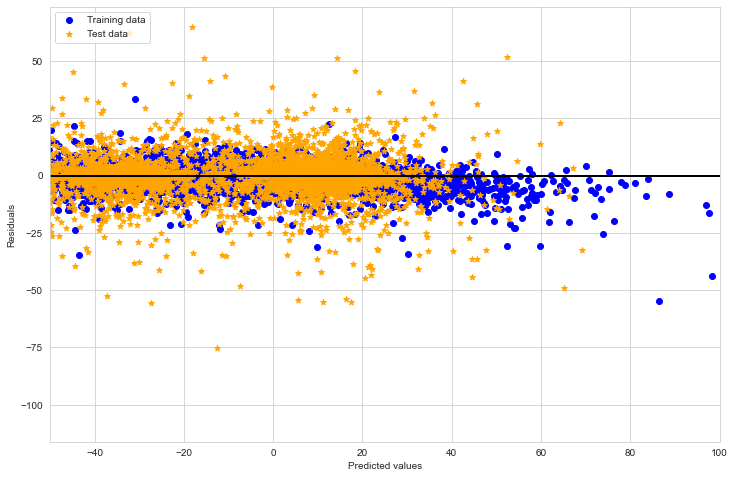

In [212]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([-50, 100])
plt.show()

## Future prediction

In [213]:
dfTrain = df[df.years < 20]
Xo = dfTrain[col_study]
yo = dfTrain[param_study]
dfTest = df[df.years > 20]
Xt = dfTest[col_study]
yt = dfTest[param_study]
X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size=0.3, random_state=42)

### Forest training

In [214]:
forest2 = RandomForestRegressor()
forest2.fit(X_traino, y_traino)

y_train_pred = forest2.predict(X_traino)
y_test_pred = forest2.predict(X_testo)
y_pred = forest2.predict(Xt)

mean_absolute_error(yt, y_pred) 

46.55359309865738

In [215]:
mean_absolute_error(y_test, y_pred_test)

3.7712725978479726

In [216]:
r2_score(yt, y_pred)

-2.7510917624865994

In [217]:
print(y_train_pred.shape," ",y_traino.shape," ",y_test_pred.shape," ",y_testo.shape)

(13154,)   (13154,)   (5638,)   (5638,)


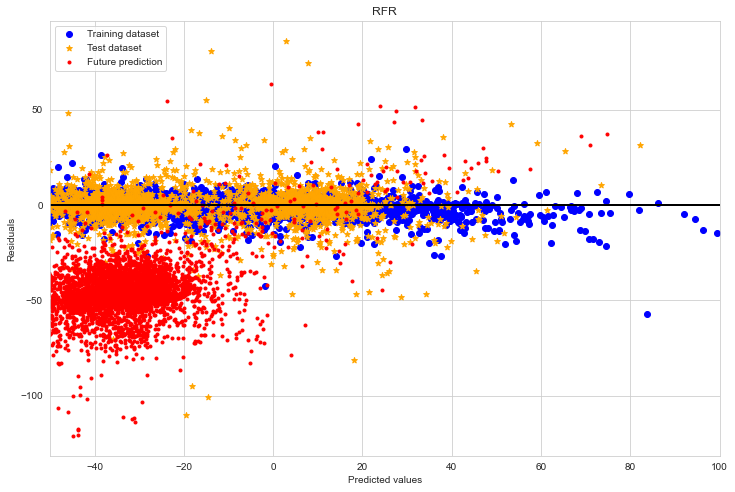

In [218]:
plt.figure(figsize=(12,8))
plt.title('RFR')
plt.scatter(y_train_pred, y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(y_test_pred, y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(y_pred, y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([-50, 100])
plt.show()

### SVR training

In [219]:
from sklearn.svm import SVR

svm2 = SVR(C=1.0, epsilon=0.2)
svm2.fit(X_traino, y_traino)

y_train_pred = svm2.predict(X_traino)
y_test_pred = svm2.predict(X_testo)
y_pred = svm2.predict(Xt)

mean_absolute_error(yt, y_pred)

18.3588518616522

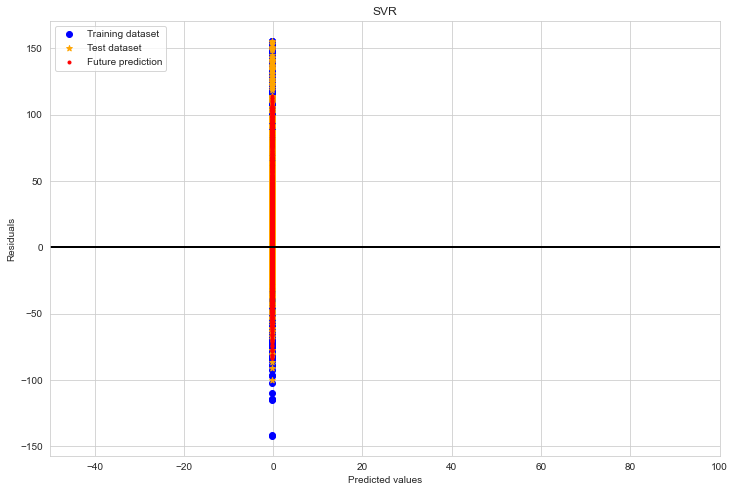

In [220]:
plt.figure(figsize=(12,8))
plt.title('SVR')
plt.scatter(y_train_pred, y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(y_test_pred, y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(y_pred, y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([-50, 100])
plt.show()

 ### ANN future
    

In [229]:

ann2 = MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0)
ann2.fit(X_traino, y_traino)

y_train_pred = ann2.predict(X_traino)
y_test_pred = ann2.predict(X_testo)
y_pred = ann2.predict(Xt)

mean_absolute_error(yt, y_pred)

561.5250254672466

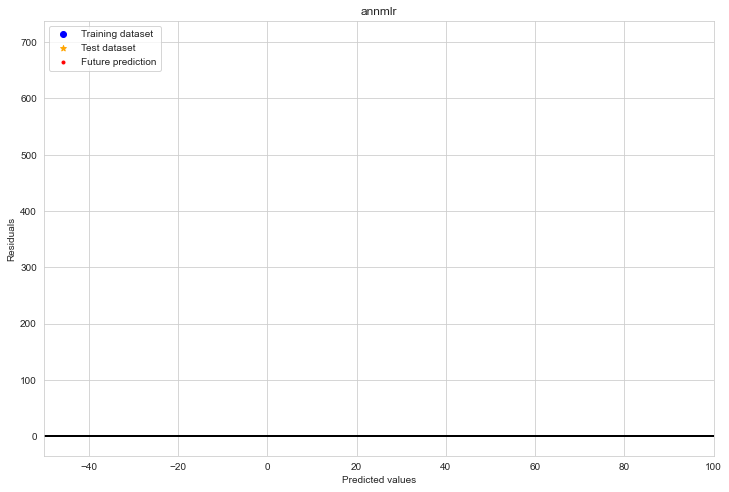

In [230]:
plt.figure(figsize=(12,8))
plt.title('annmlr')
plt.scatter(y_train_pred, y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(y_test_pred, y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(y_pred, y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([-50, 100])
plt.show()

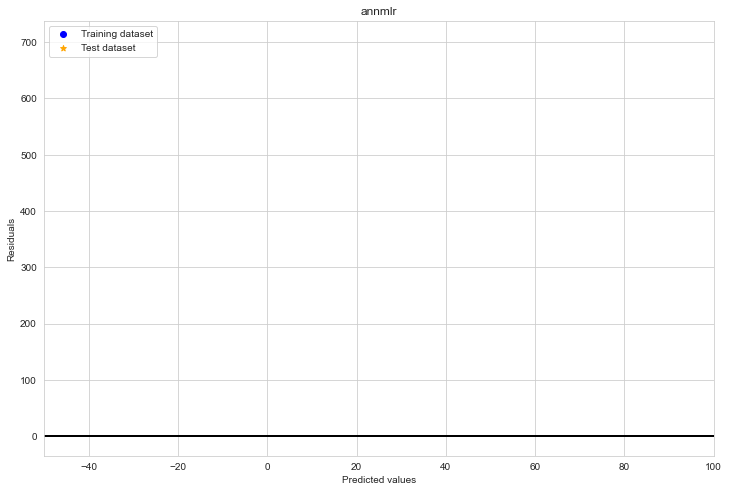

In [231]:
plt.figure(figsize=(12,8))
plt.title('annmlr')
plt.scatter(y_train_pred, y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(y_test_pred, y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
#plt.scatter(y_pred, y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([-50, 100])
plt.show()

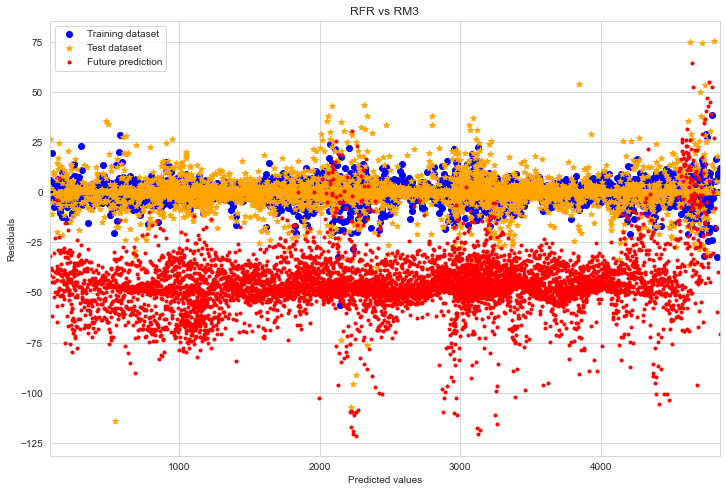

In [235]:
forest2 = RandomForestRegressor()
forest2.fit(X_traino, y_traino)

y_train_pred = forest2.predict(X_traino)
y_test_pred = forest2.predict(X_testo)
y_pred = forest2.predict(Xt)

plt.figure(figsize=(12,8))
plt.title('RFR vs RM3')
plt.scatter(X_traino['RM3'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['RM3'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['RM3'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([Xt['RM3'].values.min(), Xt['RM3'].values.max()])
plt.show()

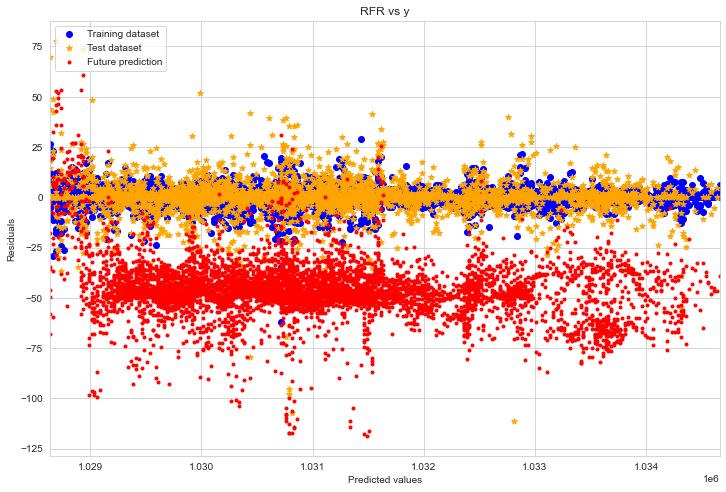

In [233]:
plt.figure(figsize=(12,8))
plt.title('RFR vs y')
plt.scatter(X_traino['y'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['y'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['y'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['y'].values.min(), X_traino['y'].values.max()])
plt.show()

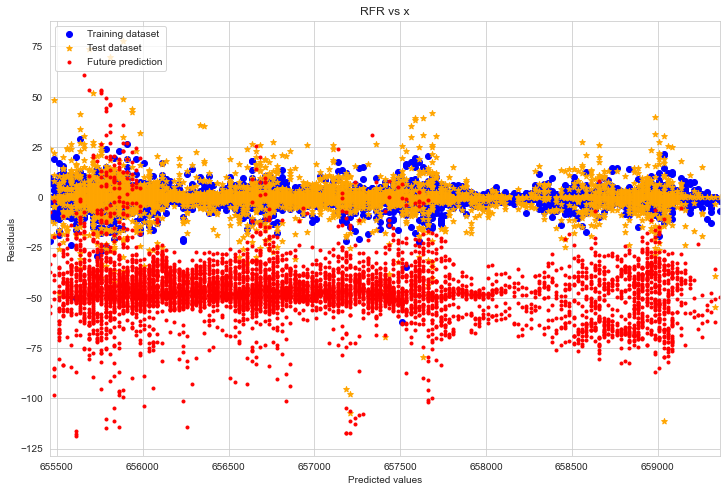

In [234]:
plt.figure(figsize=(12,8))
plt.title('RFR vs x')
plt.scatter(X_traino['x'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['x'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['x'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['x'].values.min(), X_traino['x'].values.max()])
plt.show()

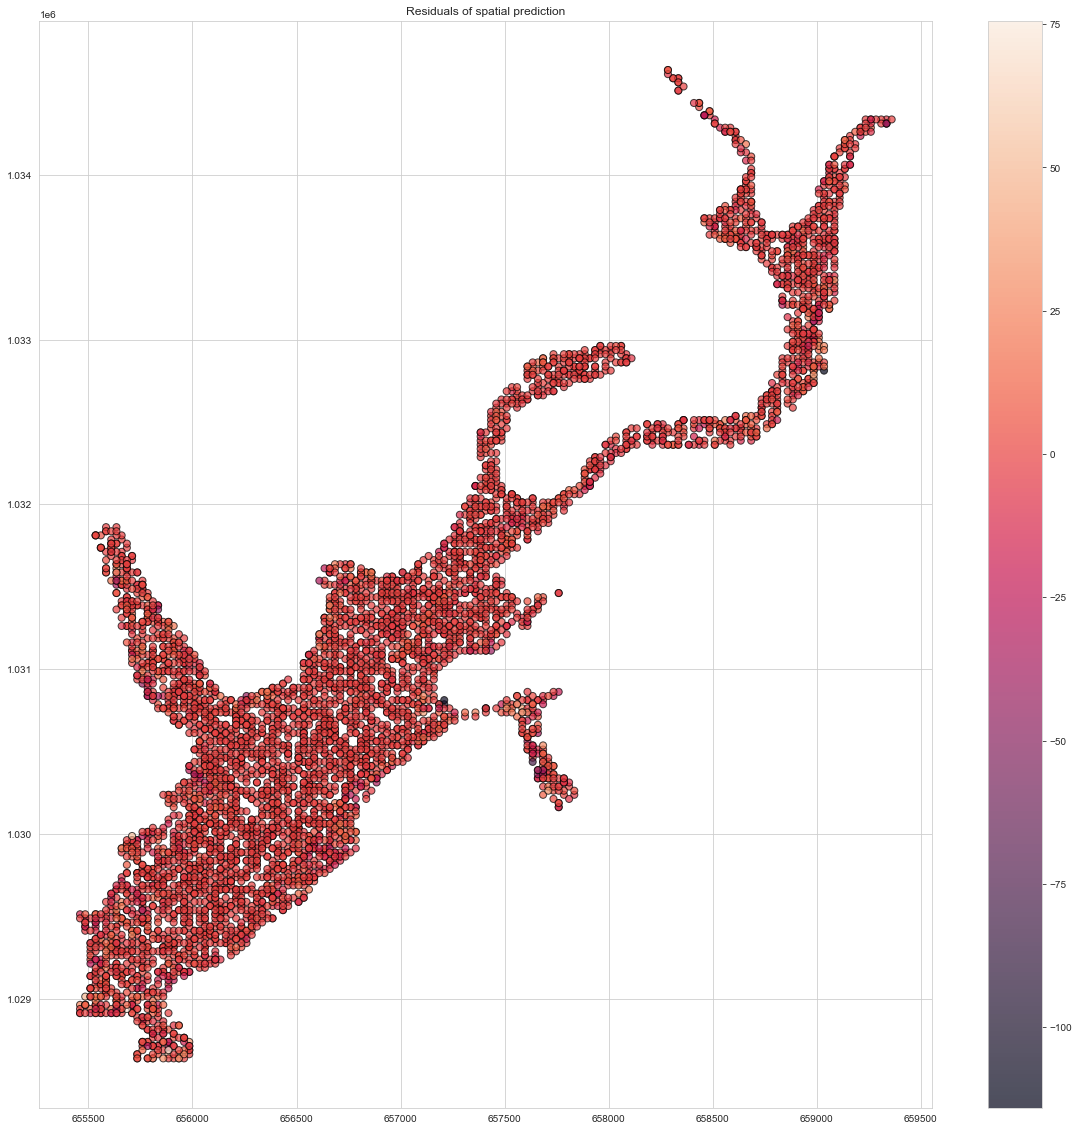

In [244]:
fig = plt.figure(figsize=(20, 20))
sc = plt.scatter(X_testo['x'], X_testo['y'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=( y_test_pred - y_testo))
plt.colorbar(sc)
plt.title('Residuals of spatial prediction')
plt.show()

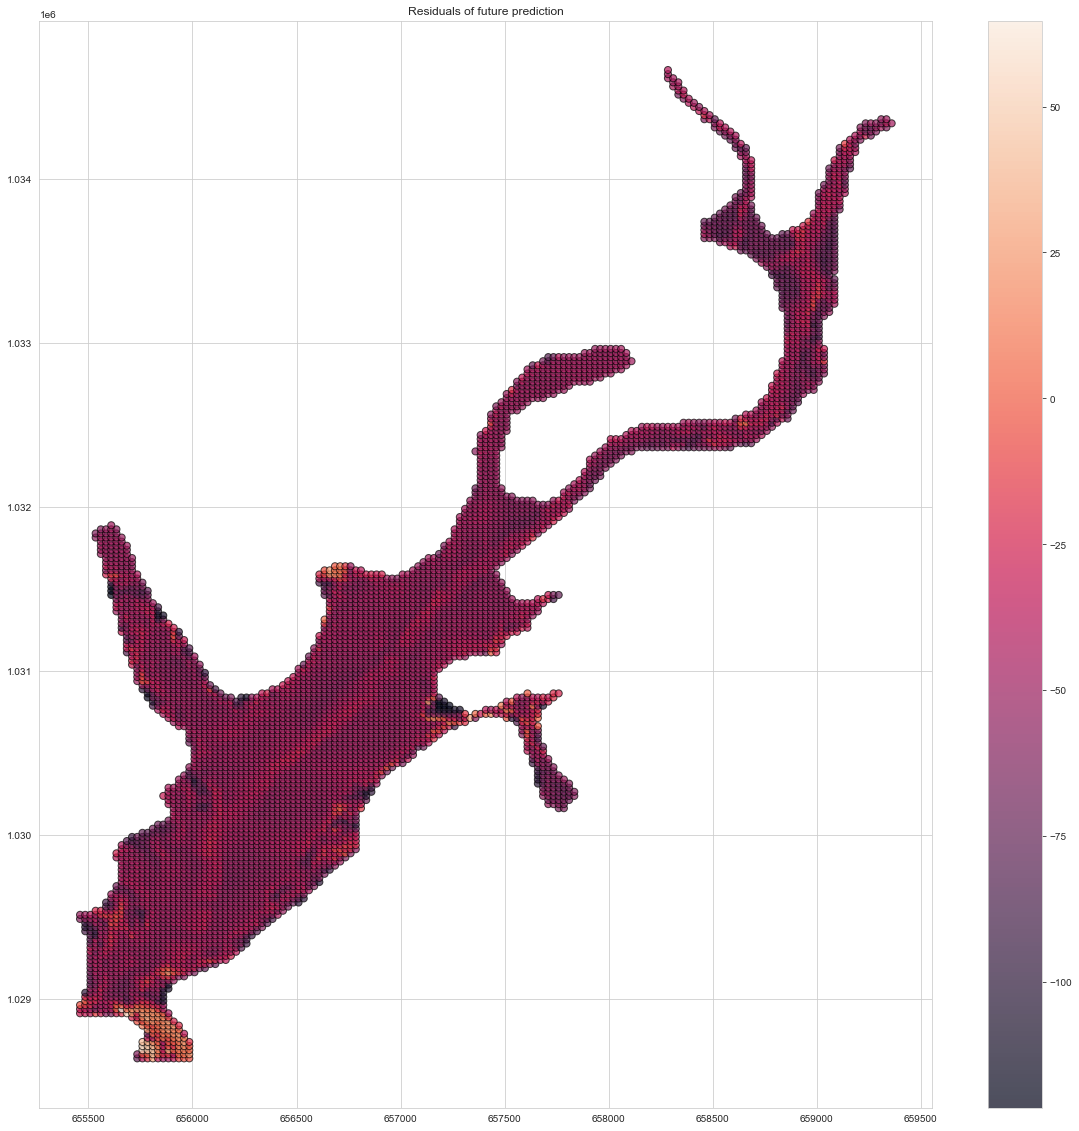

In [245]:
fig = plt.figure(figsize=(20, 20))
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=( y_pred - yt))
plt.colorbar(sc)
plt.title('Residuals of future prediction')
plt.show()

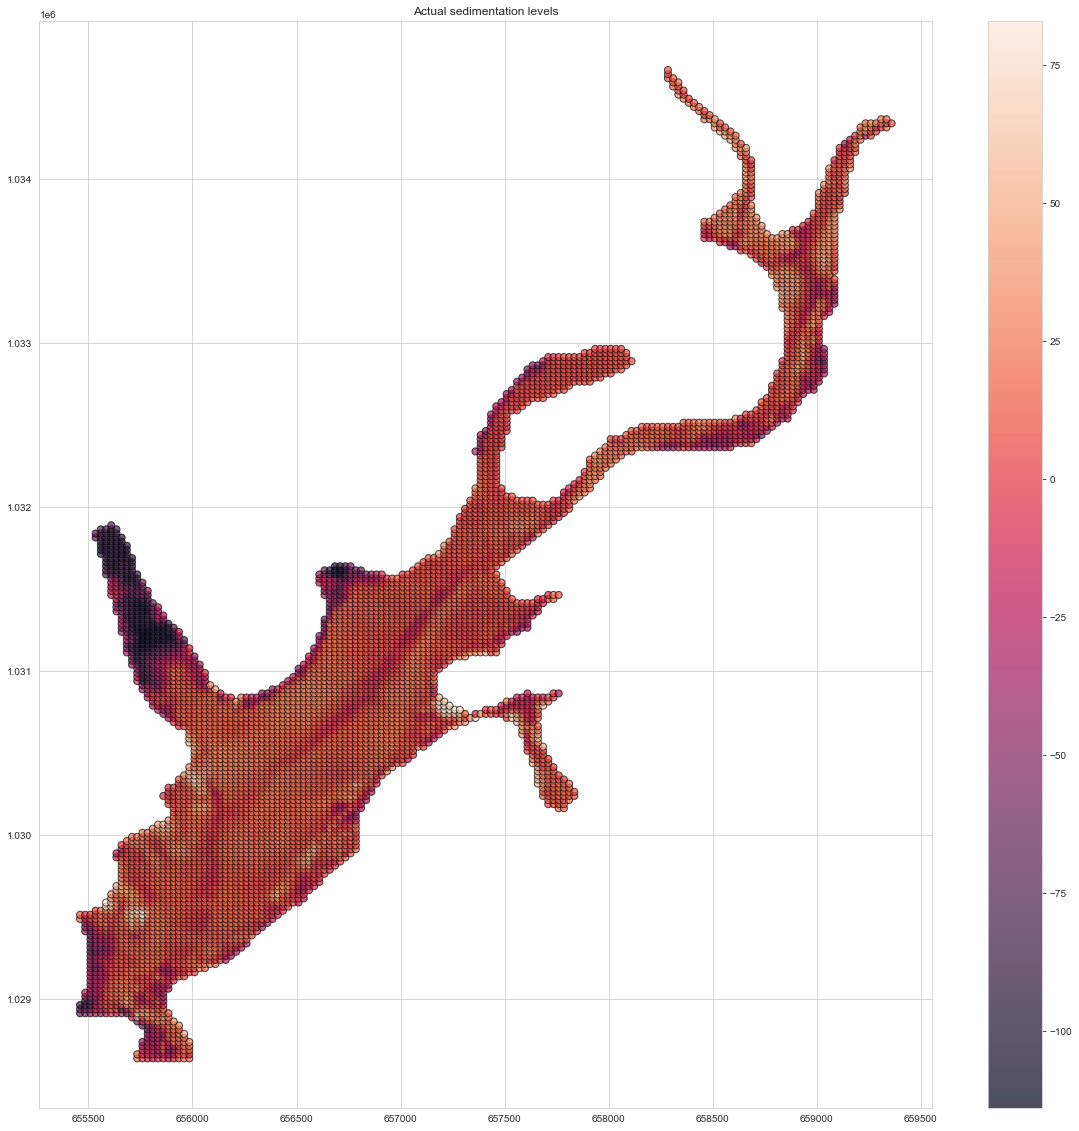

In [246]:
fig = plt.figure(figsize=(20, 20))
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=(yt))
plt.colorbar(sc)
plt.title('Actual sedimentation levels')
plt.show()


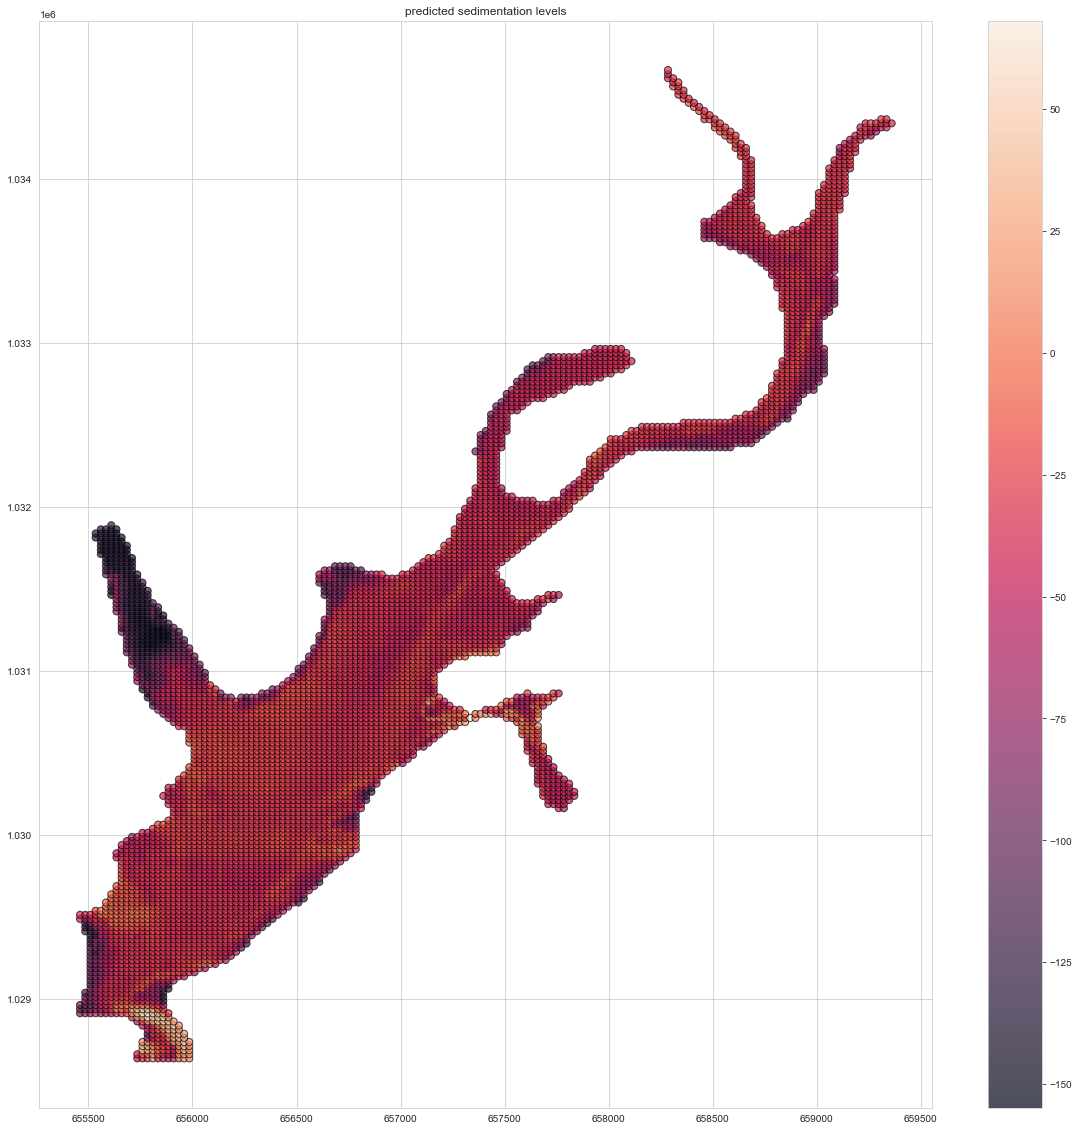

In [248]:
fig = plt.figure(figsize=(20, 20))
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=(y_pred))
plt.colorbar(sc)
plt.title('predicted sedimentation levels')
plt.show()
